In [1]:
#Prédiction du prix d'une maison 

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


In [6]:
df=pd.read_csv('/gdrive/MyDrive/Machine Learning/Machine-Learning-par-la-pratique-avec-Python-master/Boston.csv')


In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1    ZN      506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [11]:
df.duplicated().sum()

0

Analyse Exploratrice

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


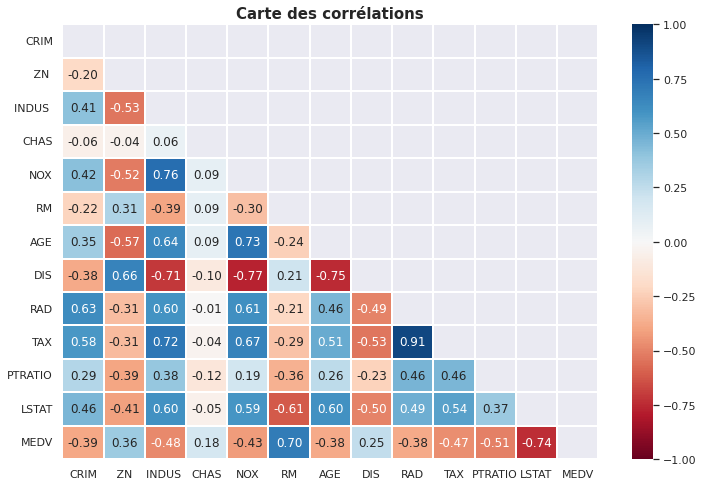

In [18]:
sns.set(rc={'figure.figsize':(12,8)})
mask=np.triu(np.ones_like(df.corr(),dtype=bool))
sns.heatmap(df.corr(),mask=mask,center=0,cmap='RdBu',linewidths=1,annot=True,fmt=".2f",vmin=-1,vmax=1)
plt.title('Carte des corrélations',fontsize=15,fontweight="bold")
plt.show()

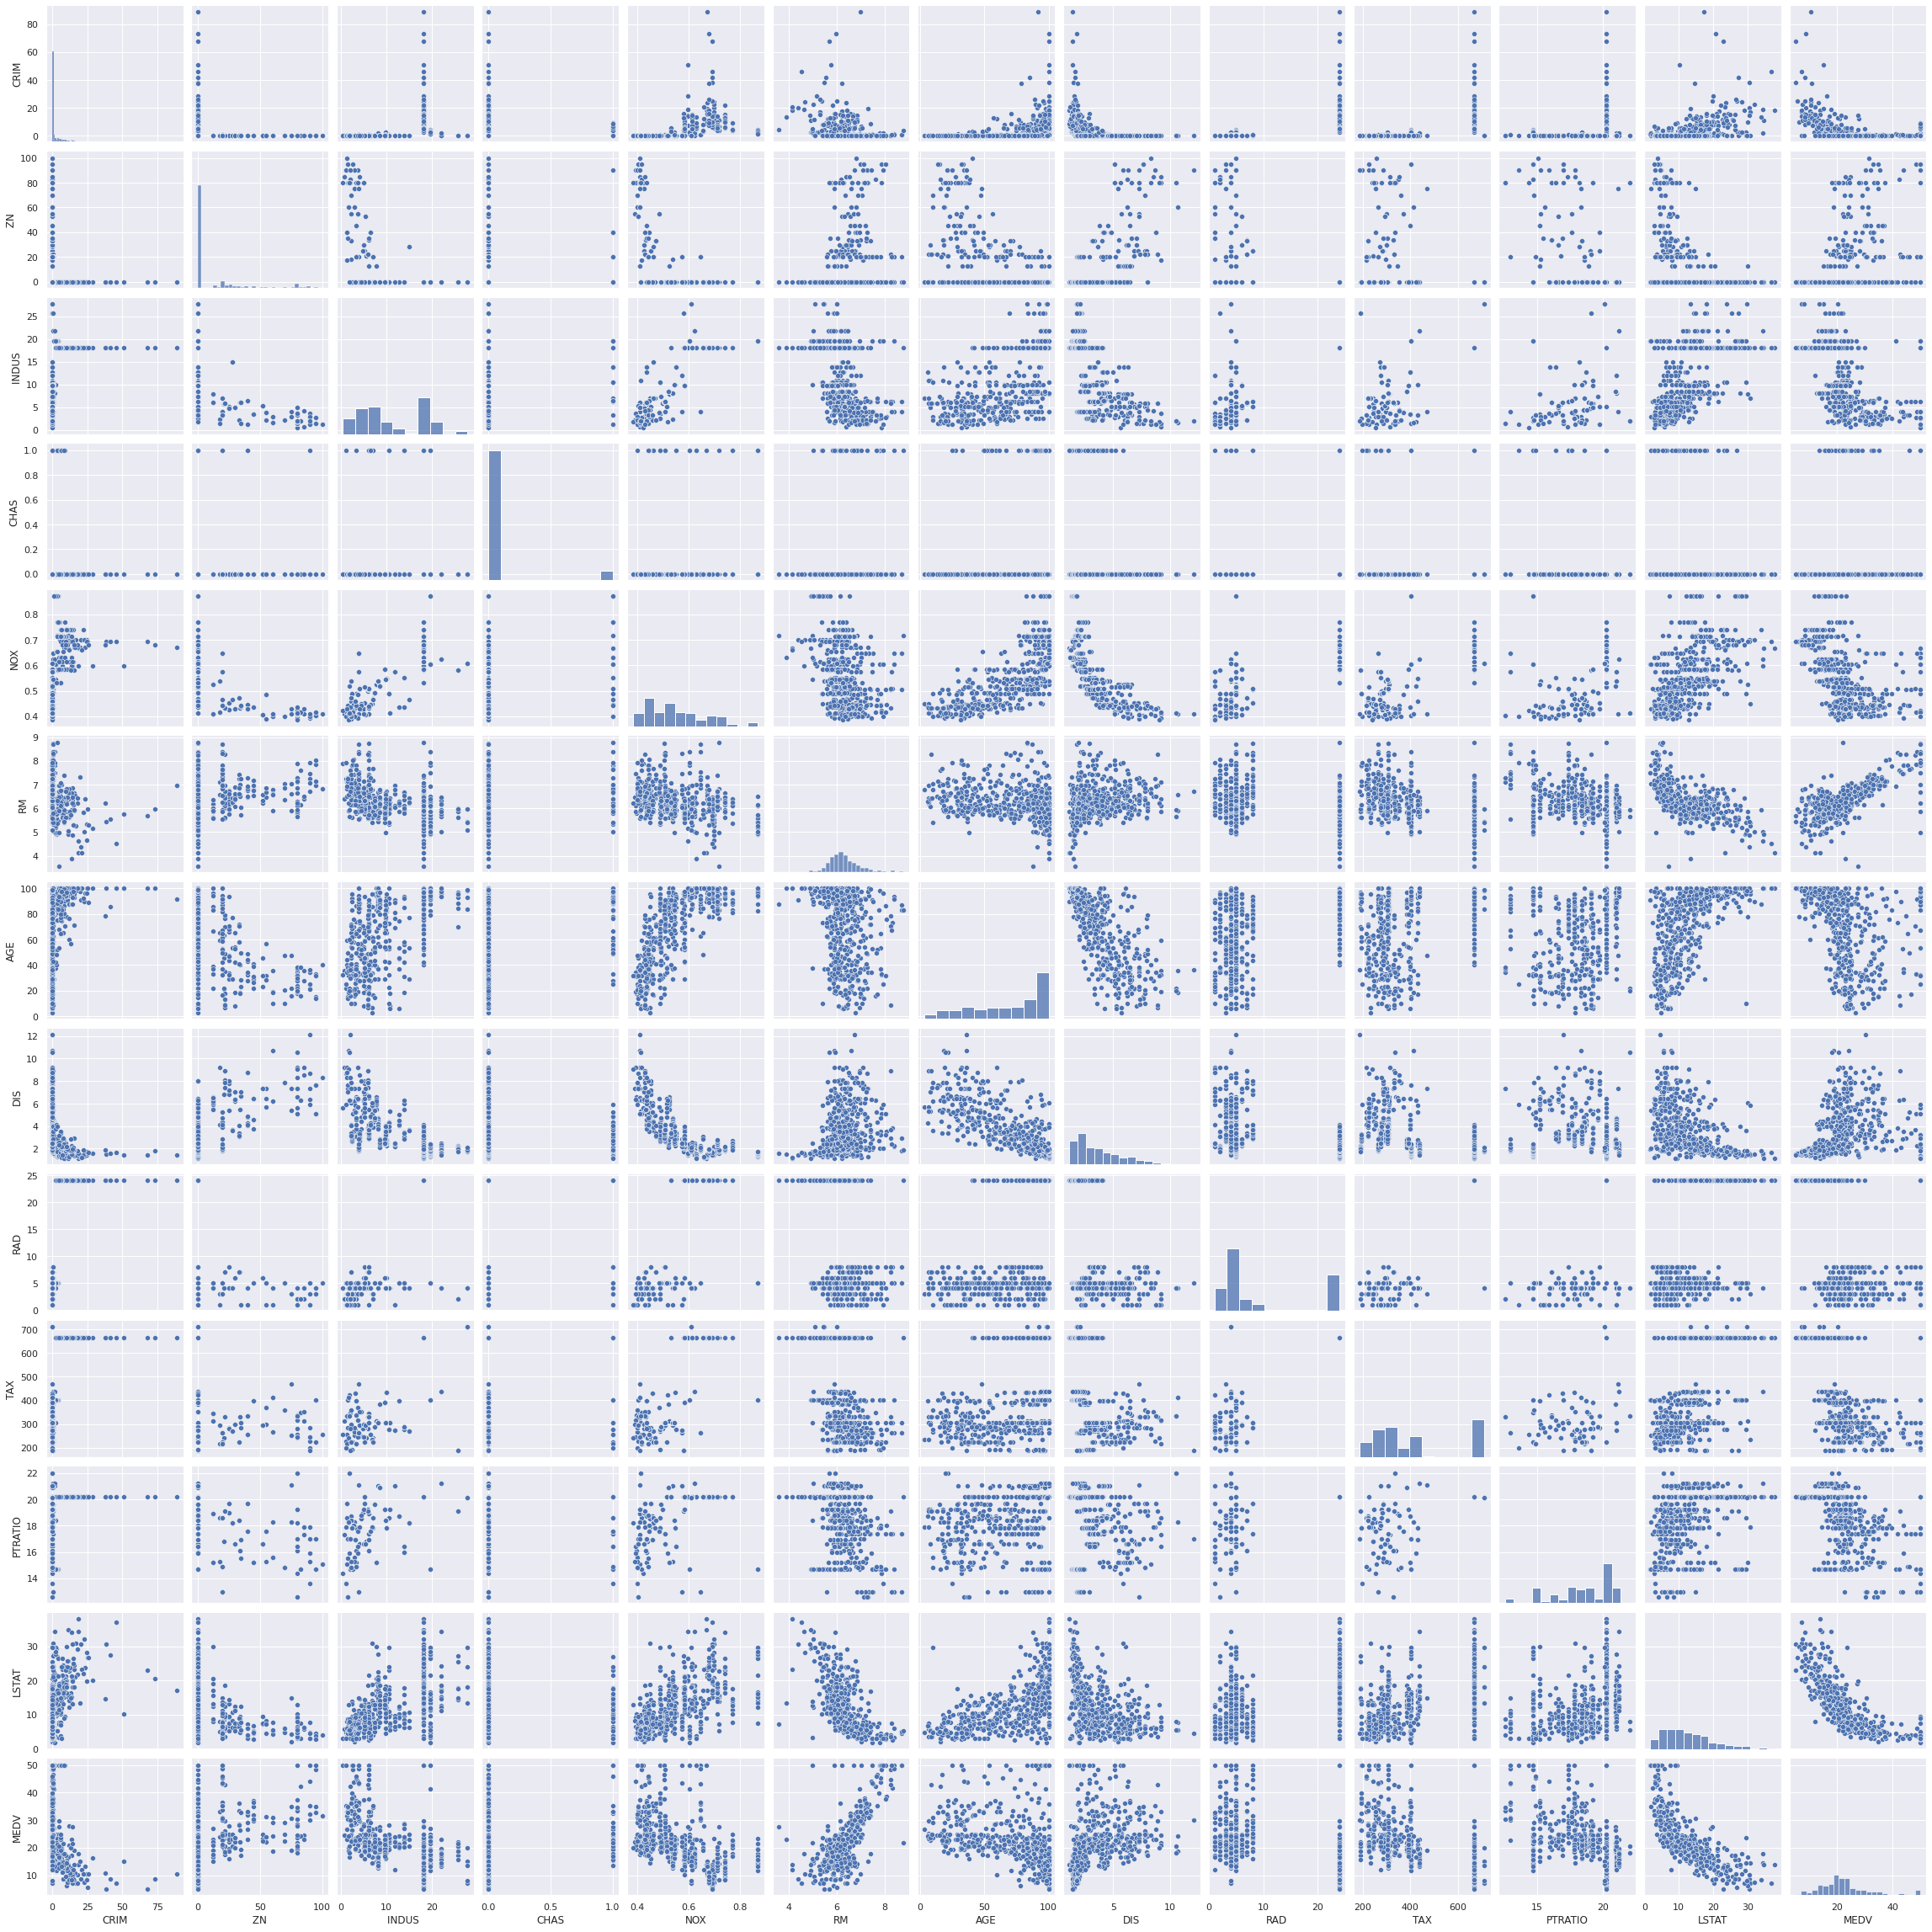

In [20]:
sns.pairplot(df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


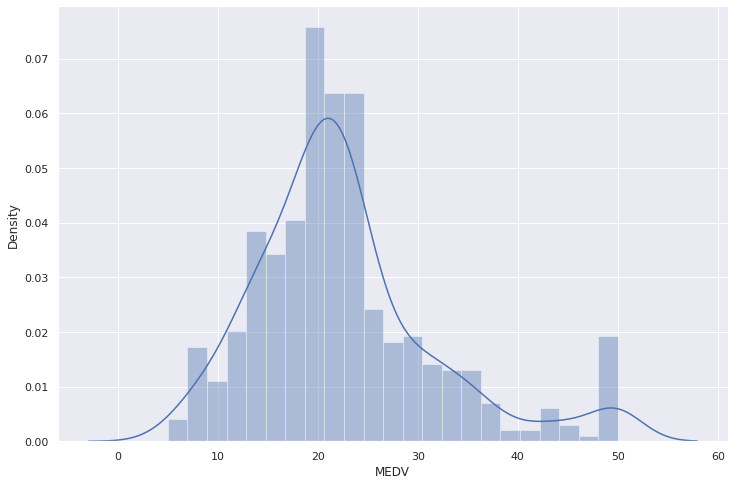

In [21]:
sns.distplot(df['MEDV'])
plt.show()

In [22]:
#Calcul des degrés d'asymétrie
df.skew().sort_values()

PTRATIO   -0.802325
AGE       -0.598963
INDUS      0.295022
RM         0.403612
TAX        0.669956
NOX        0.729308
LSTAT      0.906460
RAD        1.004815
DIS        1.011781
MEDV       1.108098
 ZN        2.225666
CHAS       3.405904
CRIM       5.223149
dtype: float64

In [26]:
df['CRIM']=np.log(df['CRIM'])
df['RAD']=np.log(df['RAD'])
df['DIS']=np.log(df['DIS'])
df['MEDV']=np.log(df['MEDV'])
df['CHAS']=np.log(df['CHAS']+1)
df[' ZN ']=np.log(df[' ZN ']+1)


In [27]:
df.skew().sort_values()

PTRATIO   -0.802325
AGE       -0.598963
MEDV      -0.330321
DIS        0.152730
RAD        0.286617
INDUS      0.295022
RM         0.403612
CRIM       0.405934
TAX        0.669956
NOX        0.729308
LSTAT      0.906460
 ZN        1.193451
CHAS       3.405904
dtype: float64

In [28]:
df.drop('CHAS',axis=1,inplace=True)

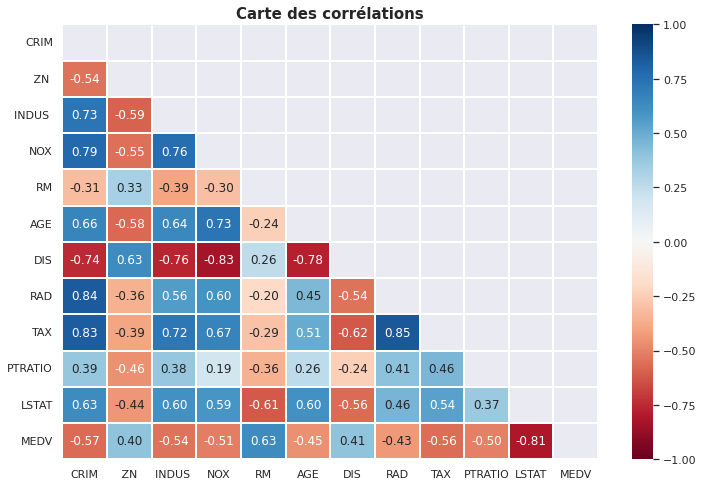

In [29]:
sns.set(rc={'figure.figsize':(12,8)})
mask=np.triu(np.ones_like(df.corr(),dtype=bool))
sns.heatmap(df.corr(),mask=mask,center=0,cmap='RdBu',linewidths=1,annot=True,fmt=".2f",vmin=-1,vmax=1)
plt.title('Carte des corrélations',fontsize=15,fontweight="bold")
plt.show()

Modélisation

In [31]:
X=df.drop('MEDV',axis=1)
y=df['MEDV']

In [32]:
#Train/Test data

In [33]:
seed=111
test_size=0.2
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=test_size,random_state=seed)

In [34]:
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (404, 11)
y_train (404,)
X_test (102, 11)
y_test (102,)


In [35]:
#Création du modèle

In [36]:
model=LinearRegression()

In [37]:
#Entrainement de l'algorithme
model.fit(X_train,y_train)

LinearRegression()

In [38]:
#Coefficient de détermination
model.score(X_train,y_train)

0.7599308321478286

In [39]:
#Coefficient du modèle
model.coef_

array([-2.18106829e-02,  4.64002574e-03,  3.95126878e-03, -7.40455507e-01,
        9.53280432e-02, -2.66628883e-04, -2.17151131e-01,  1.06946408e-01,
       -6.75755191e-04, -3.44875212e-02, -3.29385637e-02])

In [40]:
#Prédiction sur le train data
y_pred=model.predict(X_train)

In [41]:
#Erreur quadratique moyenne 
mean_squared_error(y_train,y_pred)

0.03970543844863188

In [42]:
#R^2 sur le test data
model.score(X_test,y_test)

0.7335793246239517

In [43]:
#Prédiction sur le test data
y_hat=model.predict(X_test)

In [44]:
#Erreur quadratique moyenne
mean_squared_error(y_test,y_hat)

0.04568839722859575

Validation croisee du modèle

In [46]:
#Création du modèle
linear_model=LinearRegression()

#5-fold cross-validation
cv_scores=cross_val_score(linear_model,X,y,cv=5)
cv_scores


array([0.63039073, 0.7542449 , 0.59337479, 0.4822631 , 0.45586857])

In [47]:
np.mean(cv_scores)

0.5832284181249285

In [48]:
np.median(cv_scores)

0.593374792571977

In [50]:
#Modèle final
lm=LinearRegression()
lm.fit(X,y)

LinearRegression()

In [51]:
lm.coef_

array([-2.43563529e-02,  7.31048069e-04,  3.06055544e-03, -7.79681053e-01,
        9.64873383e-02,  1.89928201e-04, -2.12488554e-01,  1.02839484e-01,
       -6.27712028e-04, -3.70149683e-02, -3.29179525e-02])

In [52]:
lm.intercept_

4.210068806396682